In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_recall_fscore_support
from sklearn.metrics import classification_report

In [30]:
data = pd.read_csv('voice.csv')

In [32]:
data

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [37]:
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['label'])

In [38]:
dict(enumerate(label_encoder.classes_))

{0: 'female', 1: 'male'}

In [39]:
data

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,0
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,0
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,0
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,0


## Splitting and Scaling

In [40]:
y = data['label'].copy()
X = data.drop('label', axis=1).copy()

In [41]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

## Modeling and Training

In [43]:
X.shape

(3168, 20)

In [44]:
inputs = tf.keras.Input(shape=(X.shape[1],))
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(inputs, outputs)

In [45]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 20)]              0         
                                                                 
 dense_5 (Dense)             (None, 64)                1344      
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5569 (21.75 KB)
Trainable params: 5569 (21.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [46]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
    ]
)

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

Epoch 1/100
56/56 [==============================] - 1s 4ms/step - loss: 0.4242 - accuracy: 0.8596 - auc: 0.9111 - val_loss: 0.2213 - val_accuracy: 0.9257 - val_auc: 0.9942
Epoch 2/100
56/56 [==============================] - 0s 1ms/step - loss: 0.1678 - accuracy: 0.9492 - auc: 0.9901 - val_loss: 0.0887 - val_accuracy: 0.9775 - val_auc: 0.9975
Epoch 3/100
56/56 [==============================] - 0s 1ms/step - loss: 0.0962 - accuracy: 0.9684 - auc: 0.9952 - val_loss: 0.0613 - val_accuracy: 0.9842 - val_auc: 0.9978
Epoch 4/100
56/56 [==============================] - 0s 1ms/step - loss: 0.0789 - accuracy: 0.9729 - auc: 0.9959 - val_loss: 0.0543 - val_accuracy: 0.9865 - val_auc: 0.9981
Epoch 5/100
56/56 [==============================] - 0s 1ms/step - loss: 0.0677 - accuracy: 0.9791 - auc: 0.9968 - val_loss: 0.0553 - val_accuracy: 0.9887 - val_auc: 0.9973
Epoch 6/100
56/56 [==============================] - 0s 2ms/step - loss: 0.0634 - accuracy: 0.9791 - auc: 0.9968 - val_loss: 0.0458 - v

In [47]:
model.evaluate(X_test, y_test)

30/30 [==============================] - 0s 910us/step - loss: 0.0610 - accuracy: 0.9758 - auc: 0.9977


[0.06103689968585968, 0.975814938545227, 0.9977298974990845]

## Using 2D CNN

In [48]:
X = tf.keras.preprocessing.sequence.pad_sequences(X, dtype=float, maxlen=25, padding='post')
X = X.reshape(-1, 5, 5)
X = np.expand_dims(X, axis=3)

In [49]:
X.shape

(3168, 5, 5, 1)

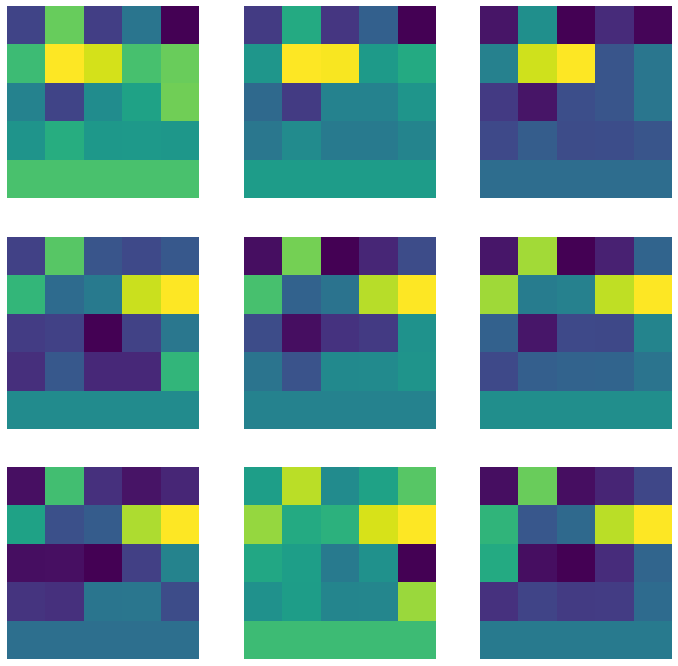

In [50]:
plt.figure(figsize=(12, 12))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(np.squeeze(X[i]))
    plt.axis('off')

plt.show()

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [52]:
inputs = tf.keras.Input(shape=(X.shape[1], X.shape[2], X.shape[3]))

x = tf.keras.layers.Conv2D(16, 2, activation='relu')(inputs)
x = tf.keras.layers.MaxPooling2D()(x)

x = tf.keras.layers.Conv2D(32, 1, activation='relu')(x)
x = tf.keras.layers.MaxPooling2D()(x)

x = tf.keras.layers.Flatten()(x)

x = tf.keras.layers.Dense(64, activation='relu')(x)

outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs, outputs)

In [53]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 5, 5, 1)]         0         
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 16)          80        
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 16)          0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 2, 2, 32)          544       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 1, 1, 32)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 32)                0   

In [54]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
    ]
)

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

Epoch 1/100
56/56 [==============================] - 1s 7ms/step - loss: 0.6682 - accuracy: 0.5629 - auc: 0.7341 - val_loss: 0.6431 - val_accuracy: 0.6667 - val_auc: 0.7815
Epoch 2/100
56/56 [==============================] - 0s 2ms/step - loss: 0.5835 - accuracy: 0.7671 - auc: 0.8464 - val_loss: 0.5275 - val_accuracy: 0.7905 - val_auc: 0.8789
Epoch 3/100
56/56 [==============================] - 0s 2ms/step - loss: 0.4514 - accuracy: 0.8426 - auc: 0.9126 - val_loss: 0.4016 - val_accuracy: 0.8581 - val_auc: 0.9259
Epoch 4/100
56/56 [==============================] - 0s 2ms/step - loss: 0.3338 - accuracy: 0.8889 - auc: 0.9512 - val_loss: 0.3142 - val_accuracy: 0.8806 - val_auc: 0.9476
Epoch 5/100
56/56 [==============================] - 0s 2ms/step - loss: 0.2710 - accuracy: 0.9064 - auc: 0.9620 - val_loss: 0.2714 - val_accuracy: 0.9054 - val_auc: 0.9589
Epoch 6/100
56/56 [==============================] - 0s 2ms/step - loss: 0.2301 - accuracy: 0.9188 - auc: 0.9725 - val_loss: 0.2366 - v

In [55]:
model.evaluate(X_test, y_test)

30/30 [==============================] - 0s 987us/step - loss: 0.1167 - accuracy: 0.9516 - auc: 0.9913


[0.11671581119298935, 0.9516298770904541, 0.9912656545639038]

In [56]:
y_pred = model.predict(X_test)

# Convert predictions to binary class labels (0 or 1)
# For example, assuming a threshold of 0.5 for binary classification
y_pred_binary = (y_pred > 0.5).astype(int)

# Flatten the predicted labels to match the expected format
y_pred_binary = y_pred_binary.flatten()

# Convert y_test (which is a Pandas Series) to a NumPy array and then flatten it
y_true = y_test.values.flatten()

# Calculate the classification report
report = classification_report(y_true, y_pred_binary)

# Print the classification report
print("Classification Report:\n", report)

30/30 [==============================] - 0s 733us/step
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       452
           1       0.95      0.96      0.95       499

    accuracy                           0.95       951
   macro avg       0.95      0.95      0.95       951
weighted avg       0.95      0.95      0.95       951



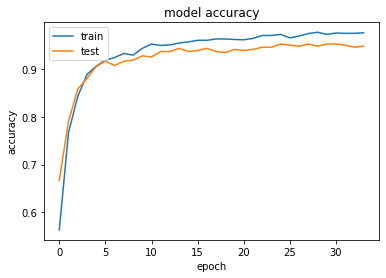

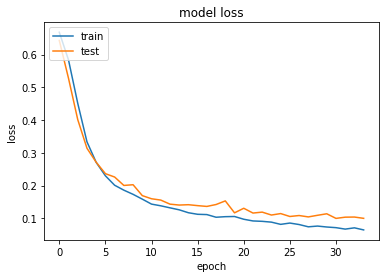

In [57]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()